# A Code-Centric Introduction to Independent Component Analysis

*This is the first in what I'm hoping to make a series of posts on representation learning and unsupervised methods in general. I've noticed that there are far fewer resources out there detailing these topics than there are for common supervised learning topics, and next-to-none that show them off in practice (i.e. with code) along with the underlying math. I'd like these posts to be accessible to a wider audience while still providing mathematical intuition.*

## Part 1: Motivation

You're at a banquet (or, more likely, a conference) eagerly waiting to hear a speech from an esteemed speaker. Unfortunately, the hall ends up being double-booked; another event, complete with its own speakers, sets up across the room from your stage. Though the unrelated buzz in the background is at first distracting, you don't find it too difficult to focus on your own speaker's words once she starts talking. Afterwards, however, the host comes to you in tears: he was hoping post a recording of the speech online, but due to the extraneous noise from the other event, the speaker's voice in the recording is incomprehensible! Perhaps unsurprisingly, the same has happened on the opposite side of the room, and the two hosts quickly begin to bicker. How can you provide both with playback exclusively featuring their own speaker's voice? Independent component analysis is here to help.

This admittedly contrived situation (albeit generalized to $n$ speakers and recordings) is referred to commonly as the 'cocktail party' problem. Though I have seen many [REFERENCES], many [REFERENCES] references to it, especially in this context, I have yet to see or hear a single example. So without further 

Much like its cousin, principal component analysis (PCA), independent component analysis aims to take a dataset, find some 'important' components that when put together in different ways seem to make up each piece of data, and use these components to represent 

In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from sklearn.decomposition import FastICA, PCA
from typing import Tuple
import os
import glob
from IPython.display import Audio, display

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline

In [4]:
# create convenience function for plotting and playing audio
def show_audio(a: Tuple[int, np.ndarray])->None: # a: (sample_rate, audio_array)
    fig, ax = plt.subplots()
    time_axis = np.linspace(start=0, stop=(len(a[1])/a[0]),num=np.round(len(a[1])))
    ax.plot(time_axis, a[1])
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Amplitude')
    display(Audio(a[1], rate=a[0]))

In [5]:
# collect all the wav files
files = glob.glob('./data/mixed_data/*.wav')

In [6]:
samp_rates = []
sound_list = []

In [7]:
# collect sampling frequencies and audio signals
for f in files:
    samp_rate, sound = wavfile.read(f)
    samp_rates.append(samp_rate)
    sound_list.append(sound)

In [8]:
# store as numpy array
audio_array = np.array(sound_list)

In [ ]:
# listen and visualize sound waves as sanity check
for a in zip(samp_rates, sound_list):
    show_audio(a)
#     fig, ax = plt.subplots()
#     ax.plot(a[1])
#     Audio(a[1], rate=a[0])

In [71]:
ica = FastICA(n_components=4)

In [72]:
S_ = ica.fit_transform(audio_array.T)

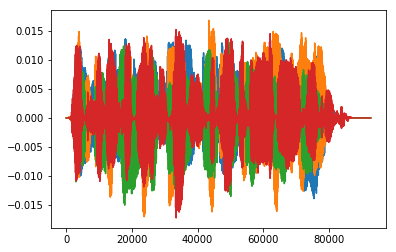

In [77]:
for row in S_.T:
    plt.plot(row)
    display(Audio(row, rate=24000))

In [ ]:
for row in S_.T:
    Audio(row, rate=24000)

In [44]:
X = audio_array
n, p = X.shape
n_components=min(n,p)
X_mean = X.mean(axis=-1)
X -= X_mean[:, np.newaxis]

# Whitening and preprocessing by PCA
u, d, _ = linalg.svd(X, full_matrices=False)

del _
K = (u / d).T[:n_components]  # see (6.33) p.140
del u, d
X1 = np.dot(K, X)
# see (13.6) p.267 Here X1 is white and data
# in X has been projected onto a subspace by PCA
X1 *= np.sqrt(p)

In [ ]:
norm_audio = (audio_array - audio_array.mean(axis=1).T.reshape(-1,1))/audio_array.std(axis=1).T.reshape(-1,1)

We begin with the assumption that the observed (mixed-source) sample data $\textbf{x}$ is a linear transformation of the independent components $\textbf{s}$, i.e. 
$$
\textbf{x} = \textbf{As}
$$
or, equivalently,
$$
\textbf{s} = \textbf{Wx}
$$
where $\textbf{W}$ is the inverse of the mixing matrix $\textbf{A}$.

To obtain the likelihood, we would like to find the distribution of $\textbf{x}$, $p_x(\textbf{x})$. What do we know about this distribution? Given the above assumption, we can write the density in terms of the distribution of $\textbf{s}$; linear transforms stretch densities by the determinant of the transform, giving us
$$
p_x(\textbf{x}) = |\det{\textbf{W}}|p_s(\textbf{s})
$$

As our entire goal in using this algorithm was to find statistically independent components of the data, we define the elements of $\textbf{s}$ to be independent:
$$
p_s(\textbf{s}) = \prod_{i=1}^n(s_i) \Rightarrow p_x(\textbf{x}) = |\det{\textbf{W}}|\prod_{i=1}^n(s_i)
$$

If we allow our sources to be represented as a matrix [EXPLAIN FURTHER], we find the log-likelihood to be:

$$
\log(p_s(\textbf{S})) = \sum_{i,j} \log p_s(\textbf{S}_{i,j}) + n\log(|det\textbf{W}|)
$$

Modeling the 

In [ ]:
S = torch.mm(W,X)

In [ ]:
L = (1/S.shape[0])*torch.sum(-torch.log(torch.cosh(S))) + torch.log(torch.abs(torch.det(W)))

In [ ]:
L

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [59]:
import torch

In [60]:
X1 = torch.tensor(X1,dtype=torch.float)

In [61]:
W = torch.randn(4,4, requires_grad=True, dtype=torch.float)

In [62]:
lr = 0.000001

In [63]:
def sigmoid_der(Y: torch.Tensor)->torch.Tensor:
    a = torch.sigmoid(Y)
    b = 1 - torch.sigmoid(Y)
    return a*b

In [64]:
torch.log(1 - (torch.tanh(Y_pred))**2)

tensor([[ -0.0002,   0.0000,  -0.0003,  ...,  -0.0000,  -0.0002,
          -0.0000],
        [ -0.0041,  -0.0026,  -0.0042,  ...,  -0.0028,  -0.0041,
          -0.0028],
        [ -0.0004,  -0.0001,  -0.0004,  ...,  -0.0001,  -0.0004,
          -0.0001],
        [ -0.0055,  -0.0060,  -0.0055,  ...,  -0.0062,  -0.0055,
          -0.0063]])

In [65]:
optimizer = torch.optim.SGD([W], lr=lr)

In [66]:
for t in range(10000):
    # forward pass
    Y_pred = torch.mm(W, X1)
    
    # compute loss
    log_likelihood = (1/Y_pred.shape[0])*torch.sum(torch.log(torch.cosh(Y_pred))) + torch.log(torch.abs(torch.det(W)))
    loss = log_likelihood
    print(t, loss)
    if torch.isnan(loss).any() or loss.item() == np.inf or loss.item() == -np.inf:
        print('Gradient vanished')
        raise Exception('Ded')
        break
    
    # compute gradient for gradient descent
    loss.backward()
    #print(W.grad)
    
    # recompute W in 'descent' step of gradient descent
    optimizer.step()
    optimizer.zero_grad()

0 tensor(76446.1875)
1 tensor(75607.1406)
2 tensor(74770.7812)
3 tensor(73937.1328)
4 tensor(73106.2578)
5 tensor(72278.1797)
6 tensor(71452.9531)
7 tensor(70630.5938)
8 tensor(69811.1641)
9 tensor(68994.7031)
10 tensor(68181.2422)
11 tensor(67370.8438)
12 tensor(66563.5469)
13 tensor(65759.3750)
14 tensor(64958.3984)
15 tensor(64160.6523)
16 tensor(63366.1836)
17 tensor(62575.0391)
18 tensor(61787.2578)
19 tensor(61002.9062)
20 tensor(60222.0195)
21 tensor(59444.6484)
22 tensor(58670.8438)
23 tensor(57900.6523)
24 tensor(57134.1289)
25 tensor(56371.3242)
26 tensor(55612.2891)
27 tensor(54857.0742)
28 tensor(54105.7305)
29 tensor(53358.3164)
30 tensor(52614.8828)
31 tensor(51875.4766)
32 tensor(51140.1641)
33 tensor(50408.9961)
34 tensor(49682.0195)
35 tensor(48959.3008)
36 tensor(48240.8828)
37 tensor(47526.8320)
38 tensor(46817.2070)
39 tensor(46112.0508)
40 tensor(45411.4297)
41 tensor(44715.3945)
42 tensor(44024.0078)
43 tensor(43337.3203)
44 tensor(42655.3867)
45 tensor(41978.2773

410 tensor(14.9762)
411 tensor(13.1432)
412 tensor(11.3393)
413 tensor(9.5272)
414 tensor(7.5974)
415 tensor(4.6188)
416 tensor(6.1402)
417 tensor(4.6730)
418 tensor(3.2220)
419 tensor(1.7637)
420 tensor(0.2520)
421 tensor(-1.4351)
422 tensor(-3.9770)
423 tensor(-4.7130)
424 tensor(-3.1672)
425 tensor(-4.7537)
426 tensor(-6.7005)
427 tensor(-5.4362)
428 tensor(-6.6194)
429 tensor(-7.9661)
430 tensor(-9.9681)
431 tensor(-10.7146)
432 tensor(-10.8422)
433 tensor(-11.1918)
434 tensor(-14.9619)
435 tensor(-9.4288)
436 tensor(-10.2101)
437 tensor(-11.0017)
438 tensor(-11.8253)
439 tensor(-12.7309)
440 tensor(-13.8985)
441 tensor(-15.8649)
442 tensor(-13.3984)
443 tensor(-14.1721)
444 tensor(-15.0813)
445 tensor(-16.5944)
446 tensor(-15.9168)
447 tensor(-17.0416)
448 tensor(-19.2049)
449 tensor(-16.5326)
450 tensor(-18.9812)
451 tensor(-15.0492)
452 tensor(-15.5619)
453 tensor(-16.0780)
454 tensor(-16.6031)
455 tensor(-17.1461)
456 tensor(-17.7219)
457 tensor(-18.3604)
458 tensor(-19.1423)
4

812 tensor(8.0784)
813 tensor(9.2455)
814 tensor(7.7192)
815 tensor(6.2227)
816 tensor(4.7338)
817 tensor(3.2013)
818 tensor(1.4345)
819 tensor(-0.7408)
820 tensor(0.5594)
821 tensor(-0.6531)
822 tensor(-1.8725)
823 tensor(-3.1456)
824 tensor(-4.6346)
825 tensor(-7.5359)
826 tensor(-3.7406)
827 tensor(-4.7220)
828 tensor(-5.7090)
829 tensor(-6.7358)
830 tensor(-7.9051)
831 tensor(-10.0569)
832 tensor(-8.1225)
833 tensor(-8.9265)
834 tensor(-9.7361)
835 tensor(-10.5721)
836 tensor(-11.4830)
837 tensor(-12.6474)
838 tensor(-14.5671)
839 tensor(-12.1187)
840 tensor(-12.8058)
841 tensor(-13.5137)
842 tensor(-14.2660)
843 tensor(-15.1147)
844 tensor(-16.2267)
845 tensor(-19.8241)
846 tensor(-10.8668)
847 tensor(-12.2268)
848 tensor(-10.9104)
849 tensor(-11.6956)
850 tensor(-12.6275)
851 tensor(-14.4617)
852 tensor(-12.5940)
853 tensor(-13.2226)
854 tensor(-13.8851)
855 tensor(-14.6345)
856 tensor(-15.6866)
857 tensor(-16.6750)
858 tensor(-15.6497)
859 tensor(-16.4592)
860 tensor(-18.1851)
8

1212 tensor(57.4466)
1213 tensor(53.9299)
1214 tensor(50.5632)
1215 tensor(47.3391)
1216 tensor(44.2504)
1217 tensor(41.2900)
1218 tensor(38.4506)
1219 tensor(35.7249)
1220 tensor(33.1049)
1221 tensor(30.5815)
1222 tensor(28.1436)
1223 tensor(25.7753)
1224 tensor(23.4485)
1225 tensor(21.0960)
1226 tensor(18.4146)
1227 tensor(16.8519)
1228 tensor(14.1026)
1229 tensor(14.6980)
1230 tensor(12.9093)
1231 tensor(11.1331)
1232 tensor(9.2979)
1233 tensor(7.0526)
1234 tensor(6.3077)
1235 tensor(2.9200)
1236 tensor(6.2941)
1237 tensor(5.0167)
1238 tensor(3.7888)
1239 tensor(2.6077)
1240 tensor(1.4707)
1241 tensor(0.3752)
1242 tensor(-0.6815)
1243 tensor(-1.7022)
1244 tensor(-2.6896)
1245 tensor(-3.6469)
1246 tensor(-4.5773)
1247 tensor(-5.4847)
1248 tensor(-6.3739)
1249 tensor(-7.2511)
1250 tensor(-8.1256)
1251 tensor(-9.0129)
1252 tensor(-9.9441)
1253 tensor(-11.0062)
1254 tensor(-12.7340)
1255 tensor(-11.8699)
1256 tensor(-12.8996)
1257 tensor(-14.5188)
1258 tensor(-14.1463)
1259 tensor(-15.6

1594 tensor(1073.0455)
1595 tensor(1031.3795)
1596 tensor(989.9624)
1597 tensor(953.5424)
1598 tensor(914.7574)
1599 tensor(880.8907)
1600 tensor(845.6133)
1601 tensor(811.3008)
1602 tensor(777.3325)
1603 tensor(746.9525)
1604 tensor(711.4122)
1605 tensor(857.5753)
1606 tensor(821.8798)
1607 tensor(787.3559)
1608 tensor(754.4835)
1609 tensor(721.5632)
1610 tensor(693.1390)
1611 tensor(663.4006)
1612 tensor(634.7311)
1613 tensor(607.0286)
1614 tensor(579.9308)
1615 tensor(555.1204)
1616 tensor(527.8212)
1617 tensor(515.3057)
1618 tensor(492.6297)
1619 tensor(470.8506)
1620 tensor(449.9366)
1621 tensor(429.8572)
1622 tensor(410.5821)
1623 tensor(392.0821)
1624 tensor(374.3284)
1625 tensor(357.2931)
1626 tensor(340.9486)
1627 tensor(325.2679)
1628 tensor(310.2243)
1629 tensor(295.7909)
1630 tensor(281.9405)
1631 tensor(268.6444)
1632 tensor(255.8697)
1633 tensor(243.5730)
1634 tensor(231.6766)
1635 tensor(219.9088)
1636 tensor(209.1599)
1637 tensor(199.4196)
1638 tensor(187.6170)
1639 ten

1984 tensor(-0.3975)
1985 tensor(-1.3491)
1986 tensor(-2.2643)
1987 tensor(-3.1450)
1988 tensor(-3.9930)
1989 tensor(-4.8101)
1990 tensor(-5.5981)
1991 tensor(-6.3587)
1992 tensor(-7.0935)
1993 tensor(-7.8044)
1994 tensor(-8.4931)
1995 tensor(-9.1612)
1996 tensor(-9.8108)
1997 tensor(-10.4437)
1998 tensor(-11.0622)
1999 tensor(-11.6688)
2000 tensor(-12.2667)
2001 tensor(-12.8598)
2002 tensor(-13.4535)
2003 tensor(-14.0564)
2004 tensor(-14.6832)
2005 tensor(-15.3644)
2006 tensor(-16.1878)
2007 tensor(-17.7158)
2008 tensor(-16.5001)
2009 tensor(-17.2480)
2010 tensor(-18.3552)
2011 tensor(-19.0097)
2012 tensor(-18.9003)
2013 tensor(-21.7549)
2014 tensor(-17.1793)
2015 tensor(-18.9389)
2016 tensor(-16.0622)
2017 tensor(-16.4909)
2018 tensor(-16.9208)
2019 tensor(-17.3561)
2020 tensor(-17.8032)
2021 tensor(-18.2727)
2022 tensor(-18.7851)
2023 tensor(-19.3909)
2024 tensor(-20.2880)
2025 tensor(-21.4463)
2026 tensor(-19.7184)
2027 tensor(-20.2328)
2028 tensor(-20.8570)
2029 tensor(-21.8383)
2

2361 tensor(-1.3957)
2362 tensor(-2.4550)
2363 tensor(-3.1182)
2364 tensor(-4.9924)
2365 tensor(-3.6062)
2366 tensor(-4.6161)
2367 tensor(-5.6541)
2368 tensor(-6.7994)
2369 tensor(-8.5053)
2370 tensor(-8.0483)
2371 tensor(-9.3332)
2372 tensor(-10.8775)
2373 tensor(-9.4508)
2374 tensor(-10.2766)
2375 tensor(-11.1777)
2376 tensor(-12.3488)
2377 tensor(-13.8371)
2378 tensor(-12.2171)
2379 tensor(-12.9366)
2380 tensor(-13.7178)
2381 tensor(-14.6798)
2382 tensor(-17.1697)
2383 tensor(-13.3407)
2384 tensor(-13.9035)
2385 tensor(-14.4676)
2386 tensor(-15.0406)
2387 tensor(-15.6351)
2388 tensor(-16.2762)
2389 tensor(-17.0297)
2390 tensor(-18.2078)
2391 tensor(-18.2501)
2392 tensor(-20.1415)
2393 tensor(-17.1601)
2394 tensor(-17.6717)
2395 tensor(-18.2093)
2396 tensor(-18.7923)
2397 tensor(-19.4623)
2398 tensor(-20.3483)
2399 tensor(-23.0040)
2400 tensor(-18.4354)
2401 tensor(-19.1330)
2402 tensor(-20.1375)
2403 tensor(-21.6392)
2404 tensor(-19.8275)
2405 tensor(-20.9480)
2406 tensor(-21.2780)


2660 tensor(1.00000e+05 *
       1.1096)
2661 tensor(1.00000e+05 *
       1.1071)
2662 tensor(1.00000e+05 *
       1.1046)
2663 tensor(1.00000e+05 *
       1.1021)
2664 tensor(1.00000e+05 *
       1.0996)
2665 tensor(1.00000e+05 *
       1.0972)
2666 tensor(1.00000e+05 *
       1.0948)
2667 tensor(1.00000e+05 *
       1.0923)
2668 tensor(1.00000e+05 *
       1.0898)
2669 tensor(1.00000e+05 *
       1.0874)
2670 tensor(1.00000e+05 *
       1.0850)
2671 tensor(1.00000e+05 *
       1.0825)
2672 tensor(1.00000e+05 *
       1.0801)
2673 tensor(1.00000e+05 *
       1.0777)
2674 tensor(1.00000e+05 *
       1.0753)
2675 tensor(1.00000e+05 *
       1.0728)
2676 tensor(1.00000e+05 *
       1.0704)
2677 tensor(1.00000e+05 *
       1.0680)
2678 tensor(1.00000e+05 *
       1.0656)
2679 tensor(1.00000e+05 *
       1.0632)
2680 tensor(1.00000e+05 *
       1.0608)
2681 tensor(1.00000e+05 *
       1.0585)
2682 tensor(1.00000e+05 *
       1.0561)
2683 tensor(1.00000e+05 *
       1.0537)
2684 tensor(1.00

2978 tensor(41649.7539)
2979 tensor(41433.9414)
2980 tensor(41218.9570)
2981 tensor(41004.3672)
2982 tensor(40792.4961)
2983 tensor(40579.6406)
2984 tensor(40369.3711)
2985 tensor(40157.8867)
2986 tensor(39947.0977)
2987 tensor(39744.4531)
2988 tensor(39536.8164)
2989 tensor(39328.9414)
2990 tensor(39124.2969)
2991 tensor(38918.2852)
2992 tensor(38712.7188)
2993 tensor(38501.2617)
2994 tensor(48578.8398)
2995 tensor(48161.4023)
2996 tensor(47747.2852)
2997 tensor(47336.4570)
2998 tensor(46928.9180)
2999 tensor(46524.6406)
3000 tensor(46123.6094)
3001 tensor(45725.8086)
3002 tensor(45331.2188)
3003 tensor(44939.8242)
3004 tensor(44551.6055)
3005 tensor(44166.5430)
3006 tensor(43784.6172)
3007 tensor(43405.8164)
3008 tensor(43030.1172)
3009 tensor(42657.4961)
3010 tensor(42287.9414)
3011 tensor(41921.4297)
3012 tensor(41557.9453)
3013 tensor(41197.4688)
3014 tensor(40839.9766)
3015 tensor(40485.4531)
3016 tensor(40133.8750)
3017 tensor(39785.2227)
3018 tensor(39439.4688)
3019 tensor(3909

3344 tensor(-0.4061)
3345 tensor(-1.5554)
3346 tensor(-2.6995)
3347 tensor(-3.8662)
3348 tensor(-5.1281)
3349 tensor(-6.8540)
3350 tensor(-6.9796)
3351 tensor(-9.2460)
3352 tensor(-7.4114)
3353 tensor(-8.3403)
3354 tensor(-9.2922)
3355 tensor(-10.3016)
3356 tensor(-11.4484)
3357 tensor(-13.0055)
3358 tensor(-17.5105)
3359 tensor(-9.0593)
3360 tensor(-9.7343)
3361 tensor(-10.3915)
3362 tensor(-11.0332)
3363 tensor(-11.6614)
3364 tensor(-12.2788)
3365 tensor(-12.8884)
3366 tensor(-13.4942)
3367 tensor(-14.1011)
3368 tensor(-14.7169)
3369 tensor(-15.3537)
3370 tensor(-16.0349)
3371 tensor(-16.8177)
3372 tensor(-17.9365)
3373 tensor(-18.7699)
3374 tensor(-18.2893)
3375 tensor(-19.6385)
3376 tensor(-19.4806)
3377 tensor(-21.6334)
3378 tensor(-19.4436)
3379 tensor(-20.6586)
3380 tensor(-24.3742)
3381 tensor(-17.9907)
3382 tensor(-18.5629)
3383 tensor(-19.2100)
3384 tensor(-20.0291)
3385 tensor(-21.6496)
3386 tensor(-20.2934)
3387 tensor(-21.1664)
3388 tensor(-22.5887)
3389 tensor(-24.4181)
3

3732 tensor(-24.9313)
3733 tensor(-11.5543)
3734 tensor(-12.5392)
3735 tensor(-14.2654)
3736 tensor(-13.0123)
3737 tensor(-13.8236)
3738 tensor(-14.8227)
3739 tensor(-17.5825)
3740 tensor(-12.9054)
3741 tensor(-13.5080)
3742 tensor(-14.1124)
3743 tensor(-14.7257)
3744 tensor(-15.3594)
3745 tensor(-16.0338)
3746 tensor(-16.7923)
3747 tensor(-17.7682)
3748 tensor(-20.5656)
3749 tensor(-15.9649)
3750 tensor(-17.0245)
3751 tensor(-17.7834)
3752 tensor(-17.2160)
3753 tensor(-18.4544)
3754 tensor(-18.1094)
3755 tensor(-19.9122)
3756 tensor(-17.7118)
3757 tensor(-18.2419)
3758 tensor(-18.8148)
3759 tensor(-19.4639)
3760 tensor(-20.2695)
3761 tensor(-21.5382)
3762 tensor(-22.7510)
3763 tensor(-22.1867)
3764 tensor(-25.1072)
3765 tensor(-19.3797)
3766 tensor(-20.0984)
3767 tensor(-21.3852)
3768 tensor(-20.7506)
3769 tensor(-21.9397)
3770 tensor(-22.1290)
3771 tensor(-24.0682)
3772 tensor(-24.4347)
3773 tensor(-15.1454)
3774 tensor(-15.7328)
3775 tensor(-16.3515)
3776 tensor(-17.0332)
3777 tenso

4121 tensor(94.8501)
4122 tensor(89.6156)
4123 tensor(84.5993)
4124 tensor(79.7896)
4125 tensor(75.1746)
4126 tensor(70.7410)
4127 tensor(66.4734)
4128 tensor(62.3507)
4129 tensor(58.3366)
4130 tensor(54.3417)
4131 tensor(49.8520)
4132 tensor(47.9639)
4133 tensor(44.3779)
4134 tensor(39.9462)
4135 tensor(39.5923)
4136 tensor(36.6775)
4137 tensor(33.8491)
4138 tensor(31.0766)
4139 tensor(28.2854)
4140 tensor(25.1124)
4141 tensor(23.5509)
4142 tensor(19.7403)
4143 tensor(20.9772)
4144 tensor(18.9078)
4145 tensor(16.9088)
4146 tensor(14.9725)
4147 tensor(13.0891)
4148 tensor(11.2453)
4149 tensor(9.4204)
4150 tensor(7.5743)
4151 tensor(5.5977)
4152 tensor(2.7230)
4153 tensor(3.4595)
4154 tensor(1.5039)
4155 tensor(-1.5066)
4156 tensor(0.6896)
4157 tensor(-1.2016)
4158 tensor(-2.3664)
4159 tensor(-3.3914)
4160 tensor(-4.7251)
4161 tensor(-5.1259)
4162 tensor(-7.8551)
4163 tensor(-5.6598)
4164 tensor(-6.8732)
4165 tensor(-8.1975)
4166 tensor(-9.8365)
4167 tensor(-15.7890)
4168 tensor(67.3101

4512 tensor(-13.7680)
4513 tensor(-14.2123)
4514 tensor(-14.6457)
4515 tensor(-15.0693)
4516 tensor(-15.4840)
4517 tensor(-15.8909)
4518 tensor(-16.2911)
4519 tensor(-16.6857)
4520 tensor(-17.0759)
4521 tensor(-17.4630)
4522 tensor(-17.8486)
4523 tensor(-18.2344)
4524 tensor(-18.6224)
4525 tensor(-19.0150)
4526 tensor(-19.4154)
4527 tensor(-19.8276)
4528 tensor(-20.2569)
4529 tensor(-20.7110)
4530 tensor(-21.2017)
4531 tensor(-21.7484)
4532 tensor(-22.3884)
4533 tensor(-23.2115)
4534 tensor(-24.6006)
4535 tensor(-24.8966)
4536 tensor(-30.6709)
4537 tensor(-1.2094)
4538 tensor(1.8324)
4539 tensor(0.4447)
4540 tensor(-0.9746)
4541 tensor(-2.5226)
4542 tensor(-4.8403)
4543 tensor(-4.0515)
4544 tensor(-5.4446)
4545 tensor(-7.0929)
4546 tensor(-9.9926)
4547 tensor(-8.0763)
4548 tensor(-9.7912)
4549 tensor(-15.2889)
4550 tensor(6.7068)
4551 tensor(4.9841)
4552 tensor(3.0707)
4553 tensor(-0.2108)
4554 tensor(1.0752)
4555 tensor(1.3545)
4556 tensor(-0.1798)
4557 tensor(-2.5059)
4558 tensor(-1.

KeyboardInterrupt: 

In [67]:
S_ = np.dot(np.dot(W.detach().numpy(), K), X).T

In [70]:
for s_ in X1.detach().numpy():
    display(Audio(s_,rate=samp_rate))

In [22]:
W

tensor([[ 14.6447,  -0.4641,  -1.3353,   2.5345],
        [  1.9343,  14.9708,   0.2821,   1.2329],
        [  0.9539,   0.7681,  15.0595,   0.8814],
        [  0.9922,  -0.4286,  -2.1615,  14.8600]])

array([[  15214.04470026,  493052.15996788,  444377.34897753,
        -295155.62392551],
       [  32027.69827958,  377334.18688168,  518843.1968111 ,
          12194.80723322],
       [ 277968.56629954,  515504.88422163,  218794.28544199,
        -125172.86969102],
       [ 104009.48842703,  573389.82209704,  294901.4326199 ,
         155257.51259819]])

In [ ]:
np.dot(W.detach().numpy().T, K).T.shape

In [ ]:
np.dot(np.dot(W.detach().numpy(), K.T), X.detach().numpy()).T

In [ ]:
K.shape

In [ ]:
for row in Y_pred.detach().numpy():
    display(Audio(row,rate=samp_rate))

In [ ]:
class LogLoss(torch.nn.Module):
    
    def __init__(self):
        super(LogLoss,self).__init__()
        
    def forward(self,W):
        S = torch.mm(W,X)
        return (1/S.shape[0])*torch.sum(torch.log(torch.cosh(S))) + torch.log(torch.abs(torch.det(W)))

In [ ]:
class ICALearner(torch.nn.Module):
    
    def __init__(self):
        super(ICALearner,self).__init__()
        self.linear = torch.nn.Linear(4, 4)
        

In [ ]:
ica.components_

In [ ]:
m = torch.nn.Linear(20,30)

In [ ]:
input = torch.randn(128,20)

In [ ]:
input

In [ ]:
output = m(input)

In [ ]:
output.shape

In [ ]:
L = LogLoss()

In [ ]:
L(W)

In [ ]:
%pdb

In [ ]:
optimizer = torch.optim.SGD(tst, lr=0.01)

In [ ]:
L.train()

In [ ]:
optimizer.step()

In [ ]:
L.backward()

In [ ]:
tst = [W]